In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 加载数据
data = {
    '社区类别': ['1-1', '1-2', '1-3', '2-1', '2-2', '2-3', '3-1', '3-2', '3-3', '4-1', '4-2', '4-3', '5-1', '5-2', '5-3'],
    'SC': [0.82, 0.99, 0.78, 0.39, 0.75, 1.0, 0.83, 0.74, 0.82, 0.71, 0.95, 0.88, 0.99, 0.96, 0.95],
    'SS': [0.37, 0.13, 0.41, 0.43, 0.36, 0.11, 0.32, 0.35, 0.33, 0.41, 0.16, 0.31, 0.19, 0.33, 0.35],
    'EM': [66.18, 45.73, 60.7, 49.11, 36.73, 32.72, 78.28, 14.11, 80.67, 58.18, 36.68, 43.19, 49.36, 80.55, 82.99],
    'IRR': ['10.8 %', '18.6 %', '8.4 %', '13.6 %', '10.5 %', '8.9 %', '10.1 %', '18.1 %', '10.0 %', '9.8 %', '19.3 %', '12.0 %', '21.2 %', '11.0 %', '9.2 %'],
    'PBY': [10, 7, 12, 9, 10, 11, 11, 7, 11, 11, 7, 9, 6, 10, 11],
    'LCOE': [0.5788, 0.5787, 0.5881, 0.2920, 0.3051, 0.7467, 0.5787, 0.6559, 0.5865, 0.5803, 0.7722, 0.6197, 0.5401, 0.5909, 0.5787],
    'RE': ['45.59 %', '13.32 %', '52.18 %', '109.66 %', '47.95 %', '10.65 %', '38.12 %', '47.35 %', '40.34 %', '57.53 %', '16.62 %', '35.61 %', '19.33 %', '34.38 %', '36.26 %']
}

df = pd.DataFrame(data)

# 将百分比转换为浮点数
df['IRR'] = df['IRR'].str.rstrip(' %').astype(float)
df['RE'] = df['RE'].str.rstrip(' %').astype(float)

In [47]:
# 将数值列转换为浮点数类型
numeric_columns = df.columns[1:-2]  # 排除 'IRR' 和 'RE'
df[numeric_columns] = df[numeric_columns].astype(float)
df = df.drop(columns=["社区类别"])

# 初始化 MinMaxScaler 对象
scaler = MinMaxScaler()
# 对 DataFrame 进行归一化处理
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

np_array = df_normalized.to_numpy()
np_array

array([[0.70491803, 0.8125    , 0.75595238, 0.1875    , 0.66666667,
        0.59725115, 0.35289365],
       [0.98360656, 0.0625    , 0.45905923, 0.796875  , 0.16666667,
        0.5970429 , 0.02696697],
       [0.63934426, 0.9375    , 0.67639373, 0.        , 1.        ,
        0.61661808, 0.41945258],
       [0.        , 1.        , 0.50813008, 0.40625   , 0.5       ,
        0.        , 1.        ],
       [0.59016393, 0.78125   , 0.32839721, 0.1640625 , 0.66666667,
        0.0272803 , 0.37672962],
       [1.        , 0.        , 0.27018002, 0.0390625 , 0.83333333,
        0.94689713, 0.        ],
       [0.72131148, 0.65625   , 0.93162021, 0.1328125 , 0.83333333,
        0.5970429 , 0.27744672],
       [0.57377049, 0.75      , 0.        , 0.7578125 , 0.16666667,
        0.75780925, 0.37066963],
       [0.70491803, 0.6875    , 0.96631823, 0.125     , 0.83333333,
        0.61328613, 0.2998687 ],
       [0.52459016, 0.9375    , 0.63980836, 0.109375  , 0.83333333,
        0.60037484, 0.4

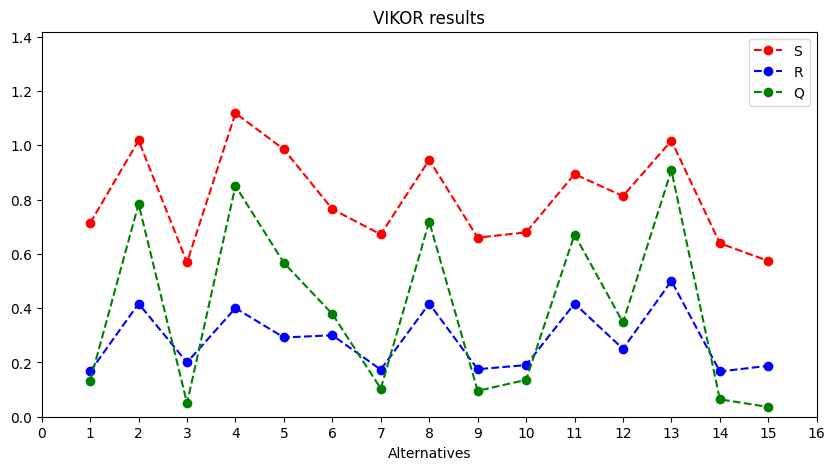

,S,R,Q
14,0.573641,0.187500,0.035981
2,0.568442,0.200000,0.050000
13,0.638862,0.166667,0.064076
8,0.659512,0.175000,0.095366
6,0.671352,0.173438,0.103796
0,0.713390,0.166667,0.131891
9,0.678930,0.190164,0.135782
11,0.812783,0.250000,0.347333
5,0.764434,0.300000,0.378338
4,0.984717,0.291816,0.566503


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 确定最优值与最劣值
# 准则函数
def best_worst_fij(a, b):
    """ 
    a ：指标值矩阵
    b ：表示指标是极大型还是极小型的数组
    """
    f = np.zeros((b.shape[0], 2)) # 初始化最优值矩阵
    for i in range(b.shape[0]):
        if b[i] == 'max':
            f[i, 0] = a.max(axis=0)[i] # 最优值
            f[i, 1] = a.min(axis=0)[i] # 最劣值
        elif b[i] == 'min':
            f[i, 0] = a.min(axis=0)[i] # 最优值
            f[i, 1] = a.max(axis=0)[i] # 最劣值
    return f

# Step 2: 计算效用值S_i 和遗憾值 R_i
def SR(a, b, c):
    """ 
    a ：指标值矩阵
    b ：最优值和最劣值矩阵
    c ：指标权重
    """
    s = np.zeros(a.shape[0])
    r = np.zeros(a.shape[0])
    for i in range(a.shape[0]):
        k = 0
        o = 0
        for j in range(a.shape[1]):
            k = k + c[j] * abs((b[j, 0] - a[i, j]) / (b[j, 0] - b[j, 1])) # 与最优值总的相对距离
            u = c[j] * abs((b[j, 0] - a[i, j]) / (b[j, 0] - b[j, 1])) # 与给定指标最优值的相对距离
            if u > o:
                o = u # 求最大遗憾值
                r[i] = o
        s[i] = k
    return s, r

# Step 3: 计算折中值 Q_i
def Q(s, r, v):
    """ 
    s ：效益值数组
    r ：遗憾值数组
    w ：折衷系数
    """
    q = np.zeros(s.shape[0])
    for i in range(s.shape[0]):
        q[i] = v*(s[i]-min(s))/(max(s)-min(s)) + (1-v)*(r[i]-min(r))/(max(r)-min(r))
    return q

# VIKOR 
def vikor(a, b, c, v=0.5, pl='y'):
    """ 
    a ：指标值矩阵
    b ：最优值和最劣值矩阵
    c ：指标权重
    y ：是否绘图
    """
    s, r = SR(a, best_worst_fij(a, b), c)
    q = Q(s, r, v)
    if pl == 'y':
        e = [i + 1 for i in range(a.shape[0])]
        plt.figure(figsize=(10, 5))  # 设置图形大小，宽度为10，高度为6
        plt.plot(e, s, 'o--', color='red', markeredgewidth=2, markersize=5)
        plt.plot(e, r, 'o--', color='blue', markeredgewidth=2, markersize=5)
        plt.plot(e, q, 'o--', color='green', markeredgewidth=2, markersize=5)
        plt.xticks(range(a.shape[0] + 2))
        plt.axis([0, a.shape[0] + 1, 0, max(np.maximum(np.maximum(s, r), q)) + 0.3])
        plt.title("VIKOR results")
        text = "Alternatives \n s:{} \n r:{}\n q:{}".format(s, r, q)
        plt.xlabel("Alternatives")
        plt.legend(['S', 'R', 'Q'])
        plt.show()
    return s, r, q

# 数据
x = np_array

# 指标权重
w = np.array([0.4, 0.3, 0.1, 0.2, 0.5, 0.3, 0.1])

# 指标方向
crit_max_min = np.array(['max', 'max', 'max', 'max','max', 'max', 'max'])

# 权衡系数
v= 0.5

# 结果
s, r, q = vikor(a=x, b=crit_max_min, c=w,v=v,pl='y')
result_df = pd.DataFrame({
    'S': s,
    'R': r,
    'Q': q
})

sorted_result_df = result_df.sort_values(by='Q')
sorted_result_df